In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pd.__version__

'2.2.2'

# 1 . Data/Domain Understanding and Exploration 


## Importing the dataset

In [4]:
df = pd.read_csv("adverts.csv")
df = df.drop('public_reference', axis=1)
df.head()

,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


## 1.1. Meaning and Type of Features
First we will show categorical and numerical features separately

In [5]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(exclude=['object']).columns

In [6]:
df[categorical_columns].head()

,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,body_type,fuel_type
0,NaN,Grey,Volvo,XC90,NEW,SUV,Petrol Plug-in Hybrid
1,61,Blue,Jaguar,XF,USED,Saloon,Diesel
2,17,Grey,SKODA,Yeti,USED,SUV,Petrol
3,16,Brown,Vauxhall,Mokka,USED,Hatchback,Diesel
4,64,Grey,Land Rover,Range Rover Sport,USED,SUV,Diesel


In [7]:
unique_colours_count = len(df["standard_colour"].value_counts())
unique_manufacturers_count = len(df["standard_make"].value_counts())
unique_models_count = len(df["standard_model"].value_counts())
unique_body_types_count = len(df["body_type"].value_counts())
unique_fuel_types_count = len(df["fuel_type"].value_counts())

print("Unique Colors: ",unique_colours_count)
print("Unique Manufacturers: ",unique_manufacturers_count)
print("Unique Models: ",unique_models_count)
print("Unique Body Types: ",unique_body_types_count)
print("Unique Fuel Types: ",unique_fuel_types_count)

Unique Colors:  22
Unique Manufacturers:  110
Unique Models:  1168
Unique Body Types:  16
Unique Fuel Types:  9


### 1.1.1 Categorical features
Here we can see every categorical feature in our dataset

1. **reg_code** : 

    A two-digit age identifier, which changes twice a year, on 1 March and 1 September. The code is either the last two digits of the year itself, if issued between March and August, or else has 50 added to that value if issued between September and February the following year - [Source](https://en.wikipedia.org/wiki/Vehicle_registration_plates_of_the_United_Kingdom)

    Since we already have a "year_of_registration" feature which indicates the age of the car, this column seems to be redundant.

2. **standard_colour** :

    Colour of the car's body. There are **22 unique** car colours.

3. **standard_make** : 

    Manufacturer of the car. There are **110 unique** car manufacturers in our dataset. 

4. **standard_model** :

    Model of the vehichle. There are **1168 unique** car models in the dataset.

5. **vehicle_condition** :

    This feature indicates whether the vehichle is **brand new** or **used**. Since the values for this feature are binary, we'll map the values to 0-1 later in the preprocessing stage, making it a numerical feature.

6. **body_type** :

    Type of the car's body. There are **16 unique** values.

7. **fuel_type** :

    Type of the fuel the cars use. There are **9 unique** values.



In [8]:
df[numerical_columns].head()

,mileage,year_of_registration,price,crossover_car_and_van
0,0.0,NaN,73970,False
1,108230.0,2011.0,7000,False
2,7800.0,2017.0,14000,False
3,45000.0,2016.0,7995,False
4,64000.0,2015.0,26995,False


### 1.1.2 Numerical features

Now we move on to explain numerical features in our dataset. There are four numerical columns in the dataset. 

1. **mileage** :   

    Number of miles a car has travelled.

2. **year_of_registration** :

    Shows the year the car was manufactured.

3. **price** :

    Price of the car. This is our target column in our model building phase.

4. **crossover_car_and_van** :

    Whether the vehicle is a car-van crossover or not. These types of cars are also commonly referred to as "smaller SUVs" or "CUVs". This column has a boolean value and since we already have a "body_type" feature, this column needs to be merged with "body_type" column in the preprocessing stage.

### 1.1.3 Analysis of Distributions

We start by analysing the Dataframe as a whole.

In [9]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
mileage,401878.0,37743.60,34831.72,0.0,10481.0,28629.5,56875.75,999999.0
year_of_registration,368694.0,2015.01,7.96,999.0,2013.0,2016.0,2018.00,2020.0
price,402005.0,17341.97,46437.46,120.0,7495.0,12600.0,20000.00,9999999.0


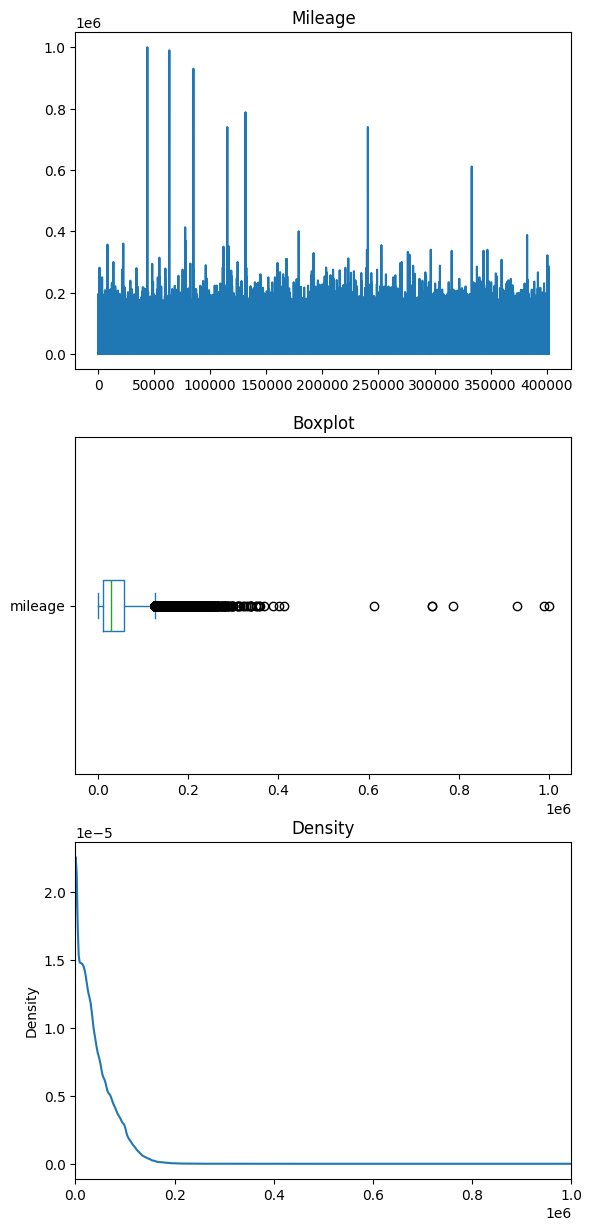

In [10]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1)

df['mileage'].plot(ax=ax1)
ax1.set_title("Mileage")
df["mileage"].plot(kind='box',vert=False,ax=ax2)
ax2.set_title("Boxplot")
df["mileage"].plot(kind='density',ax=ax3,xlim=(0,1e6))
ax3.set_title("Density")

plt.subplots_adjust(top=2.5)

By visualising the data using "Density" and "Box" charts we can clearly see that there are some outliers in our "mileage" column. For now we will ignore these to get a better visualisation and in the later phases we will drop them.

For removing the outliers we are going to use quantiles, meaning that we will ignore values higher than the 99.5 percentile.

In [11]:
df = (df[df["mileage"]<df["mileage"].quantile(.995)])
df["mileage"].describe()

count    399868.000000
mean      37000.182343
std       33115.228396
min           0.000000
25%       10378.750000
50%       28393.000000
75%       56000.000000
max      157900.000000
Name: mileage, dtype: float64

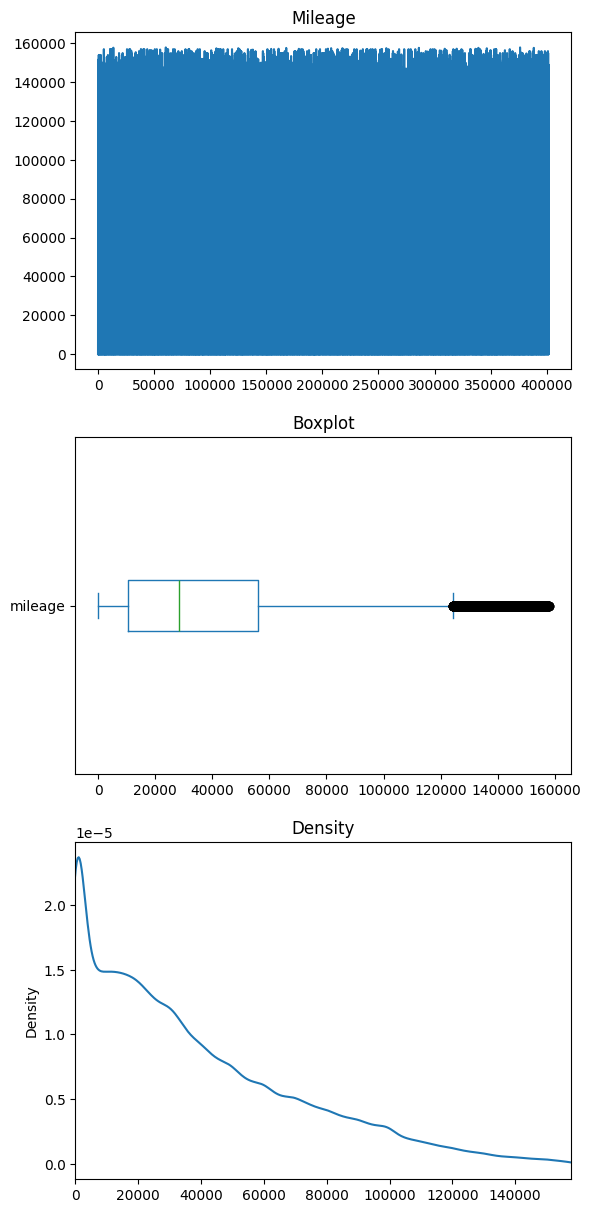

In [12]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1)

df['mileage'].plot(ax=ax1)
ax1.set_title("Mileage")
df["mileage"].plot(kind='box',vert=False,ax=ax2)
ax2.set_title("Boxplot")
df["mileage"].plot(kind='density',ax=ax3,xlim=(0,df['mileage'].max()))
ax3.set_title("Density")

plt.subplots_adjust(top=2.5)

The density chart clearly shows that there are a large number of cars with 0 or close to 0 mileage. 

In [13]:
df["fuel_type"].value_counts(normalize=True,dropna=False).sort_values()

fuel_type
Diesel Plug-in Hybrid    0.000463
Bi Fuel                  0.000553
NaN                      0.001488
Diesel Hybrid            0.003494
Electric                 0.011956
Petrol Plug-in Hybrid    0.015405
Petrol Hybrid            0.033799
Diesel                   0.391454
Petrol                   0.541389
Name: proportion, dtype: float64

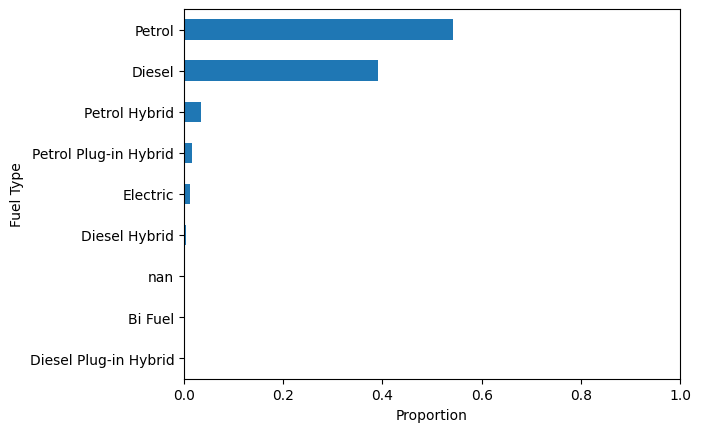

In [14]:
fig,ax = plt.subplots()
df["fuel_type"].value_counts(normalize=True,dropna=False).sort_values().plot(kind = 'barh',xlim=(0,1),ax=ax)
ax.set_xlabel("Proportion")
ax.set_ylabel("Fuel Type");


Fuel types are dominated by Petrol and Diesel as demonstrated by the chart. Since there are many types of hybrid fuel types each with insignificant number of cars, we will combine all hybrid types into one

In [15]:
df["fuel_type"]=df["fuel_type"].fillna(df["fuel_type"].mode()[0])
df.loc[df["fuel_type"].str.contains("Hybrid"),"fuel_type"]="Hybrid"

In [16]:
df["fuel_type"].value_counts(normalize=True).sort_values()

fuel_type
Bi Fuel     0.000553
Electric    0.011956
Hybrid      0.053160
Diesel      0.391454
Petrol      0.542877
Name: proportion, dtype: float64

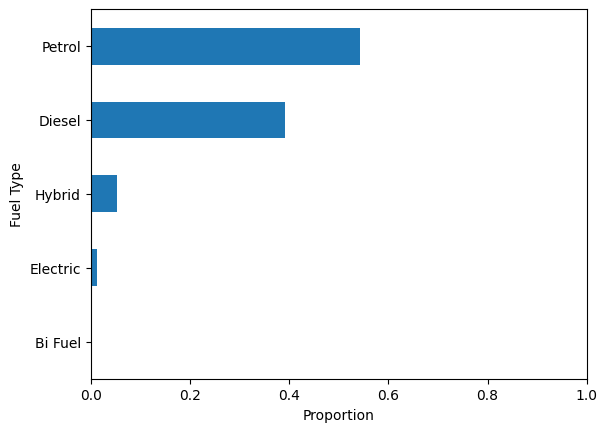

In [17]:
fig,ax = plt.subplots()
df["fuel_type"].value_counts(normalize=True,dropna=False).sort_values().plot(kind = 'barh',xlim=(0,1),ax=ax)
ax.set_xlabel("Proportion")
ax.set_ylabel("Fuel Type");

Now we'll analyse the distribution of price

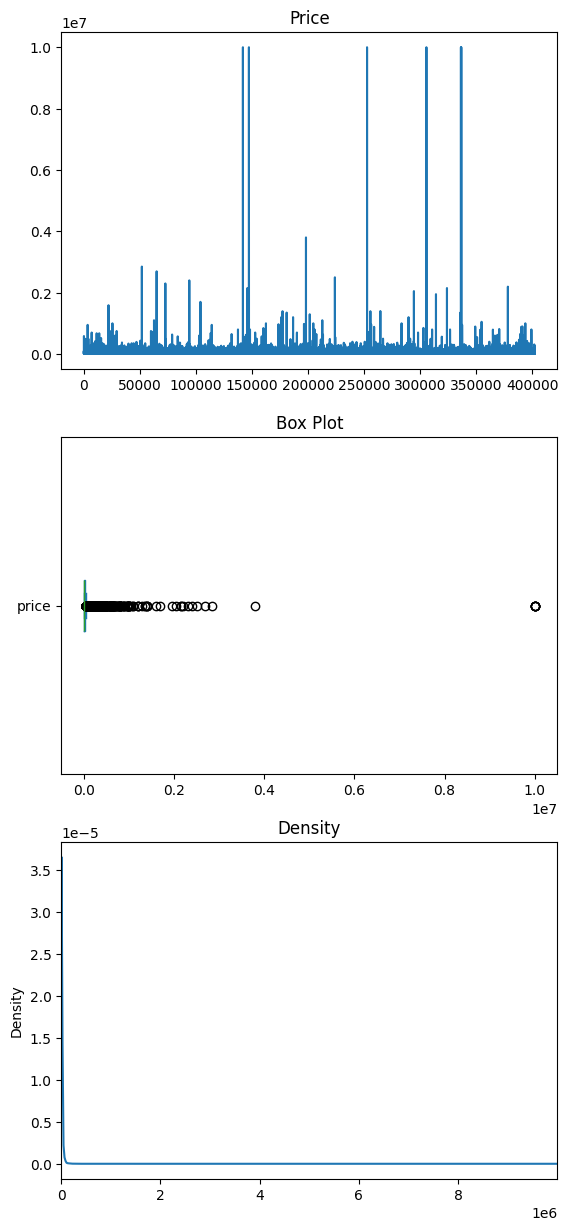

In [18]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1)

df['price'].plot(ax=ax1)
ax1.set_title("Price")
df["price"].plot(kind='box',vert=False,ax=ax2)
ax2.set_title("Box Plot")
df["price"].plot(kind='density',ax=ax3,xlim=(0,df["price"].max()))
ax3.set_title("Density")

plt.subplots_adjust(top=2.5)

Same as mileage, we first have to ignore some outliers in order to be able to represent the data properly. We will use the same 99.5 percentile here as well.


In [19]:
df = (df[df["price"]<df["price"].quantile(.995)])

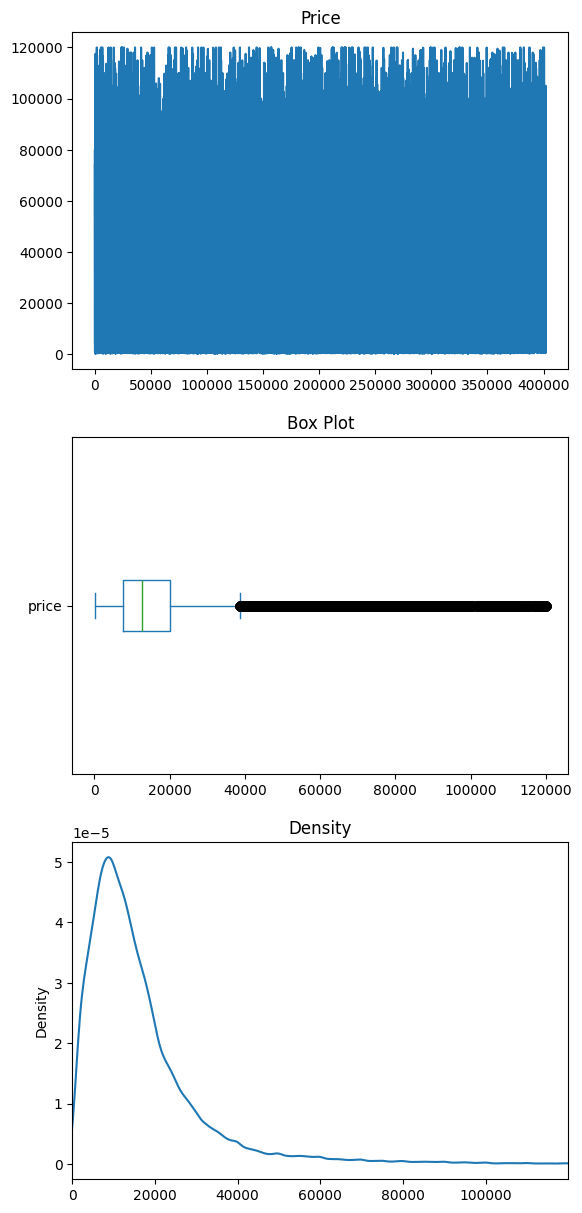

In [20]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1)

df['price'].plot(ax=ax1)
ax1.set_title("Price")
df["price"].plot(kind='box',vert=False,ax=ax2)
ax2.set_title("Box Plot")
df["price"].plot(kind='density',ax=ax3,xlim=(0,df["price"].max()))
ax3.set_title("Density")

plt.subplots_adjust(top=2.5)

## 1.2 Analysis of Predictive Power of Features

### 1.2.1 Fuel Type : 
We will start by taking a closer look at the correlation between fuel_type and price. Since the number of cars with "Bi Fuel" and "Natural Gas" fuel types are both under 0.1% , we will drop them.

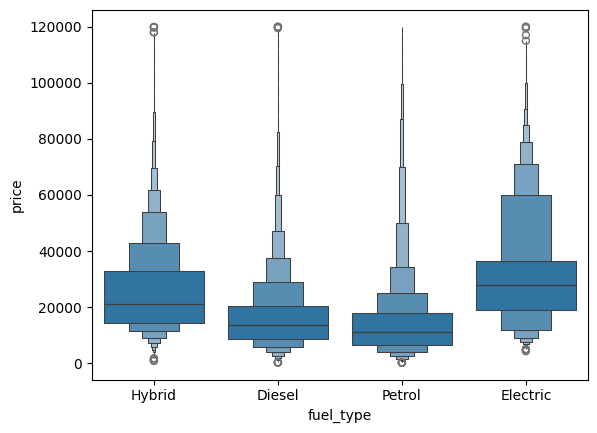

In [21]:
df = df[df["fuel_type"]!="Natural Gas"]
df = df[df["fuel_type"]!="Bi Fuel"]
sns.boxenplot(x="fuel_type", y="price", data=df,);


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397636 entries, 0 to 402004
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mileage                397636 non-null  float64
 1   reg_code               366057 non-null  object 
 2   standard_colour        392472 non-null  object 
 3   standard_make          397636 non-null  object 
 4   standard_model         397636 non-null  object 
 5   vehicle_condition      397636 non-null  object 
 6   year_of_registration   364652 non-null  float64
 7   price                  397636 non-null  int64  
 8   body_type              396847 non-null  object 
 9   crossover_car_and_van  397636 non-null  bool   
 10  fuel_type              397636 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(7)
memory usage: 33.8+ MB


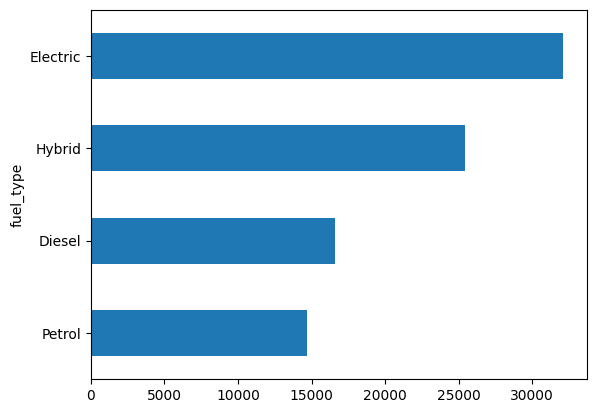

In [23]:
df.groupby('fuel_type').mean('price')['price'].sort_values().plot(kind='barh');

We can clearly observe from our data that electric cars cost considerably more on average than other types of automobiles.


### 1.2.2 Mileage :
Now we will analyse the correlation between mileage and price of a car. 

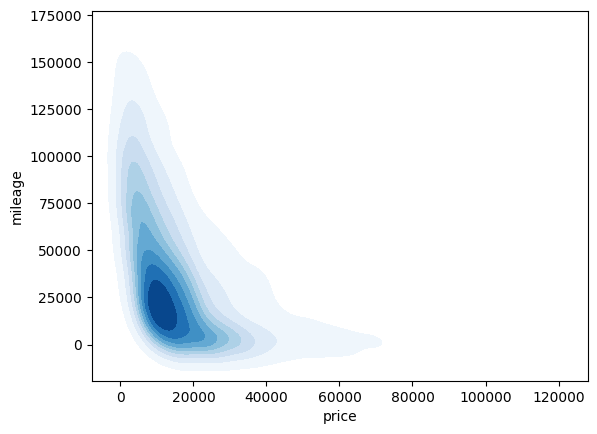

In [24]:
sampled_df = df.sample(frac=0.05)
sns.kdeplot(x='price', y='mileage', data=sampled_df, cmap='Blues', fill=True);


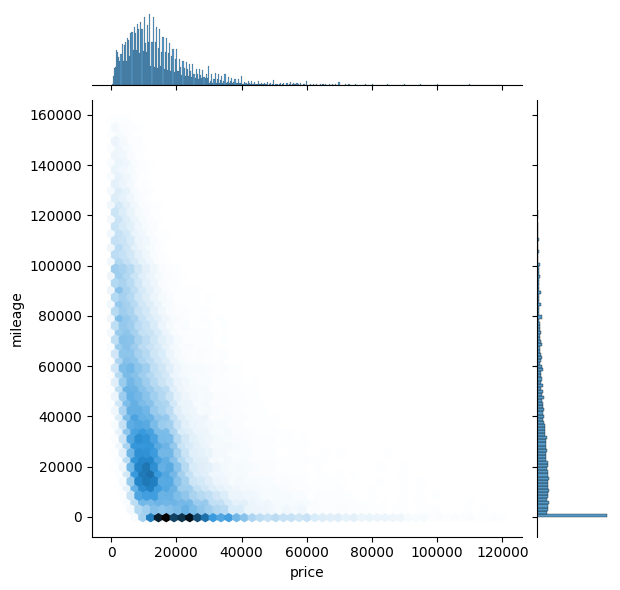

In [25]:
sns.jointplot(x='price', y='mileage', data=df, kind="hex");

In [26]:
df[["mileage","price"]].corr()


,mileage,price
mileage,1.000000,-0.470738
price,-0.470738,1.000000


We can clearly see from the charts and the correlation value that there's a negative correlation between mileage and price.

### 1.2.3 Vehicle Condition : 
Now we will analyse the correlation between price and condition of the vehicle. 

In [30]:
df.groupby('vehicle_condition').mean('price').round(1)

,mileage,year_of_registration,price,crossover_car_and_van
vehicle_condition,,,,
NEW,5.4,NaN,32739.4,0.0
USED,40309.3,2015.0,14819.2,0.0


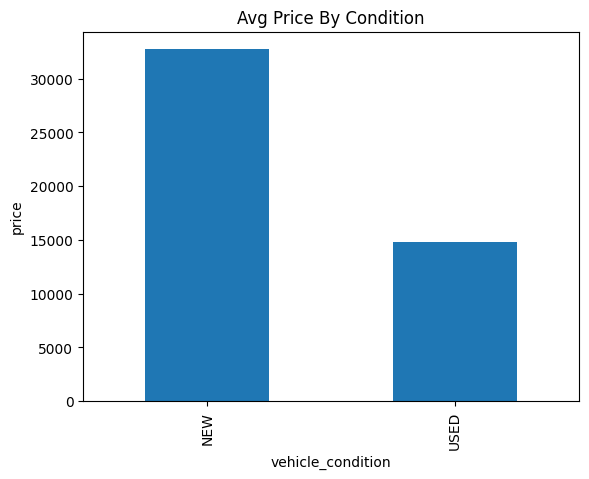

In [31]:
df.groupby('vehicle_condition').mean('price')["price"].plot(kind="bar",ylabel="price",title="Avg Price By Condition");


The data suggests that the average price of a New car is more than twice that of a Used one. 

## 1.3  Data Processing for Data Exploration and Visualisation

Some features in our data need more processing before they can be analysed or visualised properly. One such feature is "Fuel type" which we handled by reducing the total number of unique values from 9 to 4. Same should be done to more features like "Colour" and "Body type".

### 1.3.1 Colour :
This feature has a relatively high cardinality, at the same time it doesn't seem to be a crucial predicting factor in the price of car. We will try lowering the total number of unique colours by clumping the less significant ones in an "Other" category. There are also around 5k missing values in this column. we will analyse these missing values to find a relationship between them and other features namely whether these are linked to new cars or not. 

In [32]:
df["standard_colour"].isna().sum()

5164

In [33]:
df[df["standard_colour"].isna()]["vehicle_condition"].value_counts()

vehicle_condition
USED    4133
NEW     1031
Name: count, dtype: int64

The proportion of missing colour values in relation to vehicle conditon seems to be inline with dataset as a whole, So we will add them to the "other" category.

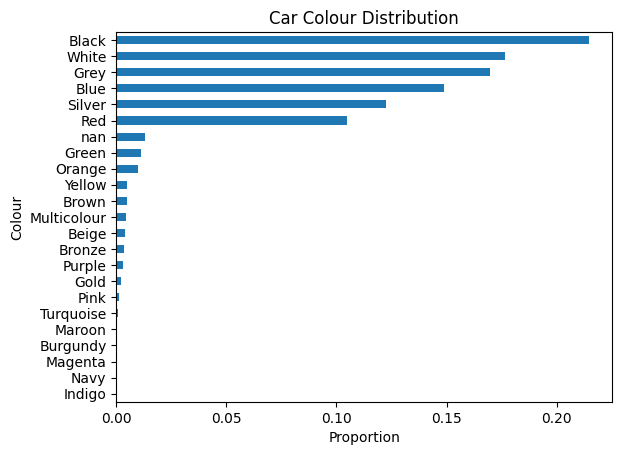

In [34]:
fig,ax = plt.subplots()
df['standard_colour'].value_counts(normalize=True,dropna=False).sort_values(ascending=True).plot(kind="barh",ax=ax)
ax.set_ylabel("Colour")
ax.set_xlabel("Proportion")
ax.set_title("Car Colour Distribution");

In [35]:
coloursCount = dict(df["standard_colour"].value_counts(normalize=True,dropna=False))
otherColoursList = []
for key,val in (coloursCount).items():
    if val < 0.1:
        otherColoursList.append(key)


In [36]:
df["standard_colour"].replace(otherColoursList,"Other",inplace=True)
df["standard_colour"].describe()

/var/folders/yb/614cxyhx0q3363qcs52dhljc0000gn/T/ipykernel_75967/3527846375.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["standard_colour"].replace(otherColoursList,"Other",inplace=True)


count     397636
unique         7
top        Black
freq       85304
Name: standard_colour, dtype: object

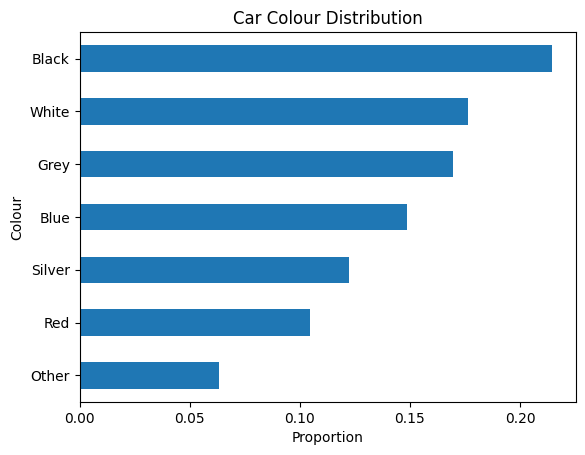

In [37]:
fig,ax = plt.subplots()
df['standard_colour'].value_counts(normalize=True,dropna=False).sort_values(ascending=True).plot(kind="barh",ax=ax)
ax.set_ylabel("Colour")
ax.set_xlabel("Proportion")
ax.set_title("Car Colour Distribution");

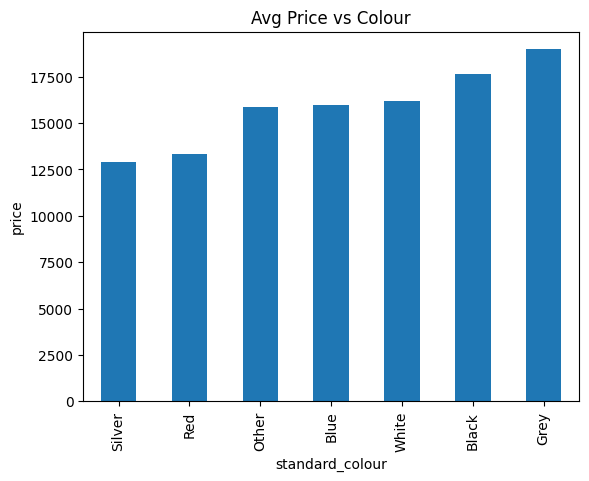

In [39]:
ax = df.groupby("standard_colour").mean('price')['price'].sort_values(ascending=True).plot(kind='bar',ylabel="price",title="Avg Price vs Colour");

### 1.3.2 Body Type : 
This feature also has a relatively high cardinality with some outliers but unlike colour it *IS* an important predictor of the price. There is also around 800 missing values which we will deal with.

In [40]:
df["body_type"].isna().sum()

789

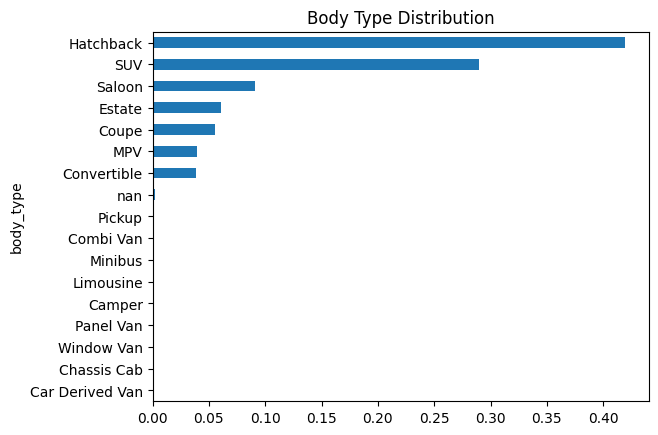

In [41]:
ax = df["body_type"].value_counts(dropna=False,normalize=True).sort_values(ascending=True).plot(kind="barh")
ax.set_title("Body Type Distribution");

In [42]:
body_type_count = dict(df["body_type"].value_counts(normalize=True,dropna=False))
other_body_type_list = []
for key,val in (body_type_count).items():
    if val < 0.04:
        other_body_type_list.append(key)


In [43]:
df["body_type"].replace(other_body_type_list,"Other",inplace=True)
df["body_type"].describe()

/var/folders/yb/614cxyhx0q3363qcs52dhljc0000gn/T/ipykernel_75967/3660349054.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["body_type"].replace(other_body_type_list,"Other",inplace=True)


count        397636
unique            6
top       Hatchback
freq         166728
Name: body_type, dtype: object

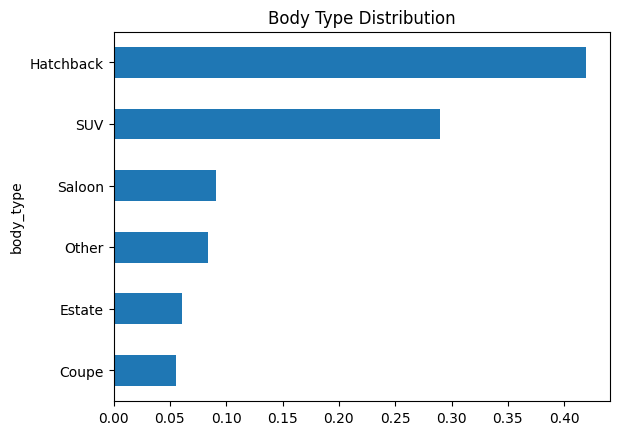

In [44]:
ax = df["body_type"].value_counts(dropna=False,normalize=True).sort_values(ascending=True).plot(kind="barh")
ax.set_title("Body Type Distribution");

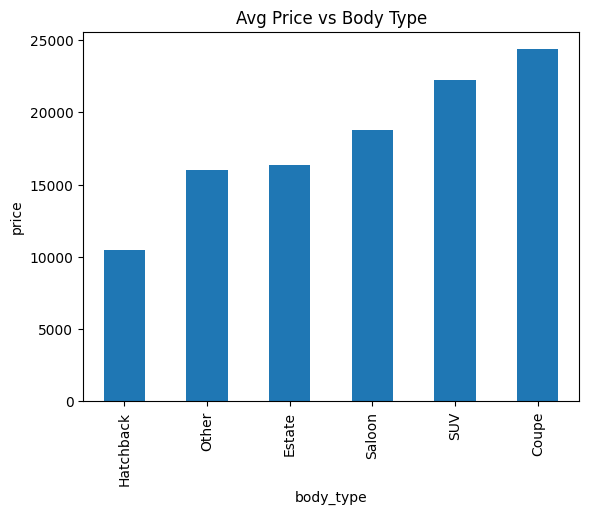

In [45]:
ax = df.groupby("body_type").mean('price')['price'].sort_values(ascending=True).plot(kind='bar',ylabel="price",title="Avg Price vs Body Type");


We have reduced the cardinality of this feature significantly. By adding an "Other" category we reduced the unique number of body types from 16 down to 6.

# 2 . Data Processing for Machine Learning

In [46]:
# MISSING VALUES IN THE RAW DATA
df_pre = pd.read_csv("adverts.csv")
df_pre = df_pre.drop('public_reference', axis=1)
df_pre.isna().sum()

mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [47]:
df_pre.isna().sum().sum()

72111

In [48]:
# MISSING VALUES THUS FAR
df.isna().sum()

mileage                      0
reg_code                 31579
standard_colour              0
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     32984
price                        0
body_type                    0
crossover_car_and_van        0
fuel_type                    0
dtype: int64

In [49]:
df.isna().sum().sum()

64563

## 2.1 Dealing with Missing Values, Outliers and Noise

A significant amount of work has already been done in this regard in previous sections. these are some of them as a reminder:

1. We dealt with outliers in "mileage" and "price" by removing values higher than the 99.5 percentile. 

2. We dealt with data with insignificant values counts by adding them up with each other and creating an "Other" category in our features.

3. We dealt with missing values in "body_type", "fuel_type" and "standard_colour" by adding them to the "other" category.

By doing these steps we have cleaned up every feature from missing values other than "reg_code" and "year_of_registration" which we are going to work on in the next sections.

### 2.1.1 Year Of Registration : 
Before we start analysing the predictive power of this feature, we have to deal with the missing values in this column. There are approximately 33 thousand missing values in this column which is a considerable amount. But with the help of "vehicle_condition" column we can get some clues as to what these missing values could be.

In [50]:
df.isna().sum()

mileage                      0
reg_code                 31579
standard_colour              0
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     32984
price                        0
body_type                    0
crossover_car_and_van        0
fuel_type                    0
dtype: int64

In [51]:
df[df.isna()["year_of_registration"]]["vehicle_condition"].value_counts()

vehicle_condition
NEW     31049
USED     1935
Name: count, dtype: int64

As we can see here, among the 33k missing values in this column, 31k of them are new cars. This means that most likely these missing values refer to cars that are yet to be registered. So logically the year of registration for these cars would be 2020 or even 2021 because the newest cars on our dataset are registered on 2020. So we will fill these missing values with 2021 to differentiate them with cars that are already registered. 

After doing so, only 1935 missing "year_of_registration" values remain in our dataset which amounts to less than 0.5% of our data, So we'll drop these values. 

In [52]:
df.loc[(df["year_of_registration"].isna()) & (df["vehicle_condition"]=="NEW"),"year_of_registration"] = 2021

In [53]:
df.isna().sum()

mileage                      0
reg_code                 31579
standard_colour              0
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration      1935
price                        0
body_type                    0
crossover_car_and_van        0
fuel_type                    0
dtype: int64

In [54]:
df = df.dropna(subset=["year_of_registration"])

In [55]:
df.isna().sum()

mileage                      0
reg_code                 31308
standard_colour              0
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration         0
price                        0
body_type                    0
crossover_car_and_van        0
fuel_type                    0
dtype: int64

### 2.1.2 Reg_Code :
Since Reg_code is a derivative of "year_of_registration" there is no point in keeping it in our dataset. By reading the wikipedia page on UK reg_code convention we can clearly conclude there's no point in keeping this feature.

In [56]:
df = df.drop('reg_code', axis=1)


## 2.2 Feature Engineering, Data Transformations, Feature Selection :



### 2.2.1 Vehicle Condition : 
Since this feature has binary values ("NEW","USED"), we will replace them with (1,0).

In [57]:
df["vehicle_condition"].replace(["USED","NEW"],[0,1],inplace=True)


/var/folders/yb/614cxyhx0q3363qcs52dhljc0000gn/T/ipykernel_75967/408364954.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["vehicle_condition"].replace(["USED","NEW"],[0,1],inplace=True)
/var/folders/yb/614cxyhx0q3363qcs52dhljc0000gn/T/ipykernel_75967/408364954.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_do

In [58]:
df.head()

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,0.0,Grey,Volvo,XC90,1,2021.0,73970,SUV,False,Hybrid
1,108230.0,Blue,Jaguar,XF,0,2011.0,7000,Saloon,False,Diesel
2,7800.0,Grey,SKODA,Yeti,0,2017.0,14000,SUV,False,Petrol
3,45000.0,Other,Vauxhall,Mokka,0,2016.0,7995,Hatchback,False,Diesel
4,64000.0,Grey,Land Rover,Range Rover Sport,0,2015.0,26995,SUV,False,Diesel


### 2.2.2 Crossover_car_van : 
As already mentioned in section 1.1.2:

"Whether the vehicle is a car-van crossover or not. These types of cars are also commonly referred to as "smaller SUVs" or "CUVs". This column has a boolean value and since we already have a "body_type" feature, this column needs to be merged with "body_type" column." 

We could add a category named "CUV" in our "body_type" feature based on the value of this column, But since the number of these cars are insignificant compared to other body types, we will add them to the "Other" category. 

In [59]:
df.loc[(df["crossover_car_and_van"]==True)&(df["body_type"]=="Other"),"body_type"] = "CUV"

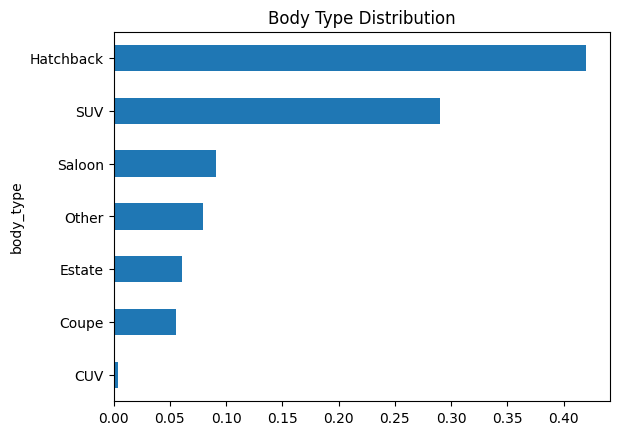

In [60]:
ax = df["body_type"].value_counts(dropna=False,normalize=True).sort_values(ascending=True).plot(kind="barh")
ax.set_title("Body Type Distribution");

"CUV"s are insignificant so we will add them to "Other" 

In [61]:
df.loc[df["body_type"]=="CUV","body_type"] = "Other"

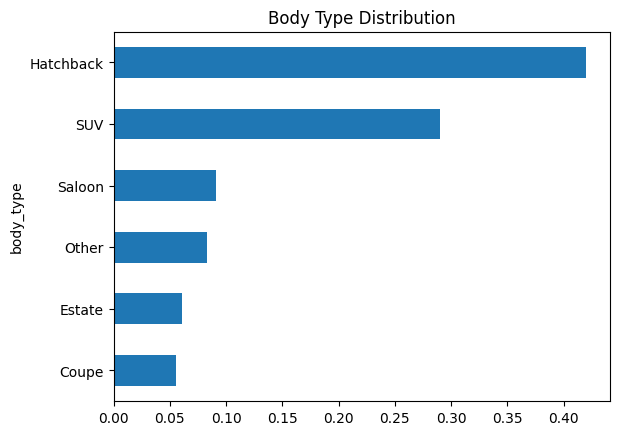

In [62]:
ax = df["body_type"].value_counts(dropna=False,normalize=True).sort_values(ascending=True).plot(kind="barh")
ax.set_title("Body Type Distribution");

Now we can safely remove the "crossover_car_and_van" column 

In [63]:
df = df.drop('crossover_car_and_van', axis=1)


### 2.2.3 : Spliting the Dataset into train/test : 

Now we move on to creating the Train/Test split for our dataset, we use the default 20% split.

In [80]:
# import ML models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Import cross-validation and splitting methods
from sklearn.model_selection import KFold, cross_val_score, train_test_split

# Import modules for preprocessing and feature scaling
from sklearn.preprocessing import StandardScaler

# Import model evaluation tools
from sklearn import model_selection 
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, r2_score, mean_squared_error, mean_absolute_error, accuracy_score

# Import modules for hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

seed = 42

In [81]:
X = df.drop('price', axis=1)
y = (df['price'])

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = seed)
print("X_train shape: ", X_train.shape, "; y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape, "; y_test shape: ", y_test.shape) 

X_train shape:  (316560, 8) ; y_train shape:  (316560,)
X_test shape:  (79141, 8) ; y_test shape:  (79141,)


### 2.2.4 Scaling and Encoding the data : 
Since "fuel_type" has relatively low cardinality, we use One_Hot_Encoding to encode the values in the column. But for the rest of the features we use target_encoder since they have high cardinality. In order to avoid data leakage we made sure to fit our transformers only on our train data.  

In [83]:
from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import OneHotEncoder

In [84]:
one_hot_encoder = OneHotEncoder(
    sparse_output=False
).set_output(transform='pandas')

In [85]:
categorical_columns_ohe = ["fuel_type"]

In [86]:
one_hot_encoder.fit(X_train[categorical_columns_ohe])
X_train = X_train.join(one_hot_encoder.transform(X_train[categorical_columns_ohe]),lsuffix="",rsuffix="_ohe")
X_test = X_test.join(one_hot_encoder.transform(X_test[categorical_columns_ohe]),lsuffix="",rsuffix="_ohe")
X_train = X_train.drop(categorical_columns_ohe, axis=1)
X_test = X_test.drop(categorical_columns_ohe, axis=1)


In [87]:
X_test.shape , X_train.shape

((79141, 11), (316560, 11))

In [88]:
target_encoder = TargetEncoder(
    target_type='continuous'
).set_output(transform='pandas')

In [89]:
categorical_columns_target_encoder = ["standard_colour","standard_make","standard_model","body_type"]


In [90]:
target_encoder.fit(X_train[categorical_columns_target_encoder], y_train)
X_train = X_train.join(target_encoder.transform(X_train[categorical_columns_target_encoder]),lsuffix="",rsuffix="_enc") 
X_test = X_test.join(target_encoder.transform(X_test[categorical_columns_target_encoder]),lsuffix="",rsuffix="_enc") 
X_train = X_train.drop(categorical_columns_target_encoder, axis=1)
X_test = X_test.drop(categorical_columns_target_encoder, axis=1)


In [91]:
X_test["standard_colour_enc"].value_counts()

standard_colour_enc
17582.250852    16896
16171.326185    14265
18959.003211    13369
15978.949024    11641
12818.429068     9656
13281.011453     8357
15818.181025     4957
Name: count, dtype: int64

# 3 . Model Building : 

## 3.1 Algorithm Selection, Model Instantiation and Configuration
First, in order to get a baseline performance for our models before any fine-tuning, we repeat the encoding process but this time on the whole data instead of fit-transorming on the train/test separately.
Then we selected 3 algorithms to implement : LinearRegressor , KNearestNeighborRegressor and DecisionTreeRegressor
We used Negative Mean Absolute Error as our scorer in this stage.

In [92]:
one_hot_encoder.fit(X[categorical_columns_ohe])

X = X.join(one_hot_encoder.transform(X[categorical_columns_ohe]),lsuffix="",rsuffix="_ohe")

X = X.drop(categorical_columns_ohe, axis=1)


In [93]:
target_encoder.fit(X[categorical_columns_target_encoder], y)

X = X.join(target_encoder.transform(X[categorical_columns_target_encoder]),lsuffix="",rsuffix="_enc") 

X = X.drop(categorical_columns_target_encoder, axis=1)


In [95]:
linr = LinearRegression(n_jobs=-1)
knnr = KNeighborsRegressor(n_jobs=-1)
dtr = RandomForestRegressor(n_jobs=-1)

In [97]:
from sklearn.metrics._regression import mean_absolute_percentage_error
from sklearn.metrics import make_scorer

models=[];
models.append(('LINR',LinearRegression(n_jobs=-1)))
models.append(("KNNR",KNeighborsRegressor(n_jobs=-1)))
models.append(('RFR', RandomForestRegressor(n_jobs=-1)))

# Set a seed for reproducibility
np.random.seed(seed)

names=[];
result=[];
make_score = make_scorer(
    score_func=mean_absolute_percentage_error,
    greater_is_better=False
)

for name,model in models:
    k_fold=model_selection.KFold(n_splits=5,shuffle=True)
    score=model_selection.cross_val_score(model,X,y, cv=k_fold, scoring=make_score);
    result.append(score)
    names.append(name)
    print(name,score.mean().round(3),score.std().round(6));

LINR -0.443 0.003434
KNNR -0.246 0.001076
RFR -0.133 0.000822


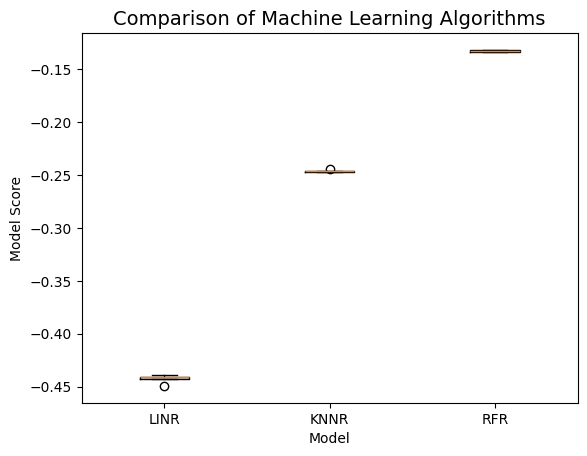

In [98]:
plt.boxplot(result,labels=names)
plt.title('Comparison of Machine Learning Algorithms',fontsize=14)
plt.gca().set(ylabel='Model Score', xlabel='Model')
plt.show()

DTR performs best

## 3.2 : Grid Search, and Model Ranking and Selection 

Now we use sklearn Gridsearch to fine-tune and find the best parameters for each model. Then we obtain the best parameters and use them to train our "best" model for each of the 3 algorithms. 

### KNN Regressor 

In [99]:
scaler = StandardScaler() # instantiate scaler
scaler = scaler.fit(X_train) 
X_train_scaled  = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test) 


In [100]:
knnr.fit(X_train_scaled,y_train)

KNeighborsRegressor(n_jobs=-1)

In [101]:
y_pred_knn = knnr.predict(X_test_scaled)

In [102]:
# Obtain the score
train_score = knnr.score(X_train_scaled, y_train)
test_score = knnr.score(X_test_scaled, y_test)

print('Training Score: %.3f' % train_score)
print('Test Score: %.3f' % test_score)

Training Score: 0.954
Test Score: 0.931


In [80]:
param_grid = {
    'n_neighbors': list(range(1,4)),
    'n_jobs' : [4]
}

from sklearn.model_selection import ParameterGrid

# Display a list of hyperparameter combinations
list(ParameterGrid(param_grid))

[{'n_jobs': 4, 'n_neighbors': 1},
 {'n_jobs': 4, 'n_neighbors': 2},
 {'n_jobs': 4, 'n_neighbors': 3}]

In [81]:
from sklearn.model_selection import GridSearchCV

# Initialize GridSearchCV with the model and parameter grid
clf = GridSearchCV(knnr, param_grid, cv=5, return_train_score=True)

# Fit the GridSearchCV on the scaled training data
gs_results = clf.fit(X_train_scaled, y_train)

# Convert GridSearchCV results to a DataFrame
gs_df = pd.DataFrame(gs_results.cv_results_)

In [82]:
gs_df.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_jobs,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.124028,0.015768,1.431254,0.043193,4,1,"{'n_jobs': 4, 'n_neighbors': 1}",0.901657,0.900375,0.894849,...,0.89923,0.002314,3,0.9909,0.989913,0.989859,0.990133,0.989713,0.990103,0.000421


In [83]:
# Display specific columns and sort by 'rank_test_score'
gs_df[[
    'param_n_neighbors', 'mean_train_score', 'std_train_score',
    'mean_test_score', 'std_test_score', 'rank_test_score'
]].sort_values('rank_test_score').head()

,param_n_neighbors,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
2,3,0.962323,0.000207,0.924780,0.001654,1
1,2,0.971560,0.000143,0.919259,0.001632,2
0,1,0.990103,0.000421,0.899230,0.002314,3


In [84]:
# Retrieve the best parameters found by GridSearchCV
gs_results.best_params_

{'n_jobs': 4, 'n_neighbors': 3}

In [85]:
# Retrieve the best estimator (model) found by GridSearchCV
gs_results.best_estimator_

KNeighborsRegressor(n_jobs=4, n_neighbors=3)

Running the best model :

In [86]:
# Retrieve the best estimator from the grid search results
best_model_knn = gs_results.best_estimator_

# Use the best model to make predictions on the test set
y_pred_knn = best_model_knn.predict(X_test_scaled)

# Evaluate the performance of the best model (e.g., accuracy)
mae = mean_absolute_percentage_error(y_test, y_pred_knn)
print(f"MAE of the best model on the test set: {mae:.4f}")

# Perform cross-validation on the entire training set using the best model
cv_scores_knn = cross_val_score(best_model_knn, X_train_scaled, y_train)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores_knn)
print(f"Mean CV Score: {cv_scores_knn.mean():.4f}")

MAE of the best model on the test set: 0.1561
Cross-Validation Scores: [0.92385414 0.92805606 0.92362645 0.92433743 0.92402556]
Mean CV Score: 0.9248


### Linear Regression : 

In [87]:
param_grid = {
    'fit_intercept':[True,False],
    'n_jobs':[4,8] # Multithreading
}

from sklearn.model_selection import ParameterGrid

# Display a list of hyperparameter combinations
list(ParameterGrid(param_grid))

[{'fit_intercept': True, 'n_jobs': 4},
 {'fit_intercept': True, 'n_jobs': 8},
 {'fit_intercept': False, 'n_jobs': 4},
 {'fit_intercept': False, 'n_jobs': 8}]

In [88]:
from sklearn.model_selection import GridSearchCV

# Initialize GridSearchCV with the model and parameter grid
clf = GridSearchCV(linr, param_grid, cv=5, return_train_score=True)

# Fit the GridSearchCV on the scaled training data
gs_results = clf.fit(X_train_scaled, y_train)

# Convert GridSearchCV results to a DataFrame
gs_df = pd.DataFrame(gs_results.cv_results_)

In [89]:
gs_df.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_fit_intercept,param_n_jobs,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.103383,0.031164,0.008313,0.003683,True,4,"{'fit_intercept': True, 'n_jobs': 4}",0.791275,0.79324,0.787888,...,0.790906,0.002339,1,0.790947,0.790421,0.791805,0.791615,0.790386,0.791035,0.000589


In [90]:
gs_df[[
    'param_fit_intercept', 'param_n_jobs',
    'mean_train_score', 'std_train_score',
    'mean_test_score', 'std_test_score', 'rank_test_score'
]].sort_values('rank_test_score').head()

,param_fit_intercept,param_n_jobs,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
0,True,4,0.791035,0.000589,0.790906,0.002339,1
1,True,8,0.791035,0.000589,0.790906,0.002339,1
2,False,4,-0.543620,0.004461,-0.544108,0.018002,3
3,False,8,-0.543620,0.004461,-0.544108,0.018002,3


In [91]:
gs_results.best_params_

{'fit_intercept': True, 'n_jobs': 4}

In [92]:
gs_results.best_estimator_

LinearRegression(n_jobs=4)

Running Best LINR model:

In [93]:
# Retrieve the best estimator from the grid search results
best_model_linr = gs_results.best_estimator_

# Use the best model to make predictions on the test set
y_pred_linr = best_model_linr.predict(X_test_scaled)

# Evaluate the performance of the best model (e.g., accuracy)
mae = mean_absolute_percentage_error(y_test, y_pred_linr)
print(f"Accuracy of the best model on the test set: {mae:.4f}")

# Perform cross-validation on the entire training set using the best model
cv_scores_linr = cross_val_score(best_model_linr, X_train_scaled, y_train) 

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores_linr)
print(f"Mean CV Score: {cv_scores_linr.mean():.4f}")

Accuracy of the best model on the test set: 0.4405
Cross-Validation Scores: [0.79127529 0.79324032 0.78788837 0.78855252 0.79357469]
Mean CV Score: 0.7909


### Decision Tree : 

In [94]:
# Define the parameter grid for Decision Tree parameters
param_grid = {
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

In [95]:
from sklearn.model_selection import ParameterGrid

# Display a list of hyperparameter combinations
list(ParameterGrid(param_grid))

[{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5},
 {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10},
 {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5},
 {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10},
 {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5},
 {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10},
 {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5},
 {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}]

In [96]:
from sklearn.model_selection import GridSearchCV

# Initialize GridSearchCV with the model and parameter grid
clf = GridSearchCV(dtr, param_grid, cv=5, return_train_score=True)

# Fit the GridSearchCV on the scaled training data
gs_results = clf.fit(X_train_scaled, y_train)

# Convert GridSearchCV results to a DataFrame
gs_df = pd.DataFrame(gs_results.cv_results_)

In [97]:
gs_df.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.583397,0.075455,0.005831,0.000665,10,2,5,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}",0.915881,0.917698,...,0.914891,0.001779,8,0.924304,0.92538,0.923977,0.925112,0.921824,0.92412,0.001257


In [98]:
gs_df[[
    'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
    'mean_train_score', 'std_train_score',
    'mean_test_score', 'std_test_score', 'rank_test_score'
]].sort_values('rank_test_score').head()

,param_max_depth,param_min_samples_leaf,param_min_samples_split,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
7,20,4,10,0.967282,0.000232,0.936217,0.000821,1
6,20,4,5,0.968405,0.000235,0.935425,0.000879,2
5,20,2,10,0.971014,0.000241,0.933514,0.001114,3
4,20,2,5,0.976627,0.000150,0.929290,0.001538,4
3,10,4,10,0.923429,0.001246,0.915842,0.001582,5


In [99]:
gs_results.best_params_

{'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}

In [100]:
gs_results.best_estimator_

DecisionTreeRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10)

In [101]:
# Retrieve the best estimator from the grid search results
best_model_dt = gs_results.best_estimator_

# Use the best model to make predictions on the test set
y_pred_dt = best_model_dt.predict(X_test_scaled)

# Evaluate the performance of the best model (e.g., MAE)
mae = mean_absolute_percentage_error(y_test, y_pred_dt)
print(f"MAE of the best model on the test set: {mae:.4f}")

# Perform cross-validation on the entire training set using the best model
cv_scores_dt = cross_val_score(best_model_dt, X_train_scaled, y_train) 

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores_dt)
print(f"Mean CV Score: {cv_scores_dt.mean():.4f}")

MAE of the best model on the test set: 0.1406


Cross-Validation Scores: [0.93690171 0.93743734 0.93485836 0.93604186 0.93593251]
Mean CV Score: 0.9362


# 4 . Model Evaluation and Analysis 

## 4.1 Coarse-Grained Evaluation/Analysis

First we will create a Table comparing different algorithms and their performances 
We can observe that DecisionTreeRegressor has the lowest MAPE and highest training Score. So for our dataset performs best. 

In [102]:
from sklearn.metrics import make_scorer

model_scores = {
    'Model': ['LINR', 'DT', 'KNN'],
    'Test MAPE': [mean_absolute_percentage_error(y_test, y_pred_linr), 
                      mean_absolute_percentage_error(y_test, y_pred_dt), mean_absolute_percentage_error(y_test, y_pred_knn)],
    'Mean Training Score': [cv_scores_linr.mean(), cv_scores_dt.mean(), cv_scores_knn.mean()],
}

# Creating a DataFrame from the model_scores dictionary
scores_df = pd.DataFrame(model_scores)

# Displaying the DataFrame
print(scores_df)

  Model  Test MAPE  Mean Training Score
0  LINR   0.440492             0.790906
1    DT   0.140617             0.936234
2   KNN   0.156111             0.924780


## 4.2 Feature Importance : 
Feature importance analysis for a linear regression model involves examining the coefficients assigned to each feature. So we first obtain the coefficients from our models. then we plot the data compared to our original dataframe, positive coefficients indicate a positive relationship with the target variable, while negative coefficients indicate a negative relationship, so values further from 0 indicate a stronger importance for each feature. Here we can see that "standard_model" is the most important feature in terms of predictive power which is expected.

Unfortunately I could not reproduce our result achieved earlier and did not have the plot saved so the plot was lost but the code used to achieve the result is here: 

In [113]:
feature_names = np.array(['standard_model', 'standard_make', 'standard_colour','fuel_type','year_of_registration'])  


coefficients = linr.coef_
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(feature_names, coefficients)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Feature Importance for Linear Regression')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute '_validate_params'